In [1]:
import os
import datetime
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import copy
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 16
plt.style.use('ggplot')

In [2]:
experiment_files = ['../results/4_tags_output.csv']#,'../results/1_output.csv']#['../results/2_output.csv', '../results/3_output.csv', '../results/4_output.csv', '../results/1_output.csv']
hive_names = ['Normal Hive 1']#, 'Normal Hive 2']

experiment_df_list = []
for file in experiment_files:
    df = pd.read_csv(file, comment='#', header = 0)
    experiment_df_list.append(df)

print(experiment_df_list[0].dtypes)
print(experiment_df_list[0]['result_type'].unique())
print(experiment_df_list[0]['tag_type'].unique())

experiment_df_list[0]

day_num                                  int64
diff_mean_all_tracked_speeds           float64
diff_mean_clustering                   float64
diff_mean_density                      float64
diff_mean_min_tracked_speeds           float64
diff_mean_node_degree                  float64
diff_median_all_tracked_speeds         float64
diff_median_clustering                 float64
diff_median_density                    float64
diff_median_min_tracked_speeds         float64
diff_median_node_degree                float64
diff_percent_idle_all_tracked          float64
diff_percent_idle_min_tracked          float64
diff_spread_all_tracked_all_xy         float64
diff_spread_all_tracked_individuals    float64
diff_spread_min_tracked_all_xy         float64
diff_spread_min_tracked_individuals    float64
mean_all_tracked_speeds                float64
mean_clustering                        float64
mean_density                           float64
mean_min_tracked_speeds                float64
mean_node_deg

,day_num,diff_mean_all_tracked_speeds,diff_mean_clustering,diff_mean_density,diff_mean_min_tracked_speeds,diff_mean_node_degree,diff_median_all_tracked_speeds,diff_median_clustering,diff_median_density,diff_median_min_tracked_speeds,...,median_node_degree,percent_idle_all_tracked,percent_idle_min_tracked,result_type,spread_all_tracked_all_xy,spread_all_tracked_individuals,spread_min_tracked_all_xy,spread_min_tracked_individuals,tag_type,time_period
0,0,1.206705,-0.067182,0.003626,1.260831,-3.065324,1.088351,-0.070695,0.005853,1.093740,...,4.297297,0.953007,0.953921,real,7.576839,8.481660,7.553676,7.505706,0,night
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.342393,0.937974,0.938575,real,7.575321,7.865889,7.548720,7.386622,0,day
2,0,1.119255,-0.067182,0.003626,1.118889,-3.065324,0.765629,-0.070695,0.005853,0.765629,...,4.297297,0.955047,0.955242,real,8.345090,7.916808,8.343535,7.837481,1,night
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.342393,0.941774,0.942002,real,8.752007,8.110280,8.752247,8.093142,1,day
4,0,1.426798,-0.067182,0.003626,1.425302,-3.065324,1.217051,-0.070695,0.005853,1.217051,...,4.297297,0.941412,0.941536,real,8.687788,8.226009,8.687543,8.207234,2,night
5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.342393,0.922707,0.922867,real,7.999995,7.672388,8.003679,7.702210,2,day
6,0,0.654689,-0.067182,0.003626,0.763778,-3.065324,0.541381,-0.070695,0.005853,0.541381,...,4.297297,0.971693,0.972845,real,5.081397,7.311256,5.060111,5.849402,3,night
7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.342393,0.964771,0.965192,real,4.837710,6.092842,4.832071,5.836651,3,day
8,0,1.127141,-0.067182,0.003626,1.136816,-3.065324,0.889343,-0.070695,0.005853,0.857155,...,4.297297,0.953679,0.953988,real,8.252602,8.077833,8.248215,7.829195,All,night
9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.342393,0.940171,0.940448,real,8.508791,8.027667,8.507138,7.947568,All,day


In [3]:
real_result_df_list = []
shuffled_result_df_list = []
bootstrapped_result_df_list = []

for df in experiment_df_list:
    real_df = df[df['result_type'] == 'real'].reset_index()
    real_result_df_list.append(real_df)
    
    shuffled_df = df[df['result_type'] == 'shuffled'].reset_index()
    shuffled_result_df_list.append(shuffled_df)
    
    bootstrapped_df = df[df['result_type'] == 'bootstrapped'].reset_index()
    bootstrapped_result_df_list.append(bootstrapped_df)
    
real_result_df_list[0]
#shuffled_result_df_list[0]
#bootstrapped_result_df_list

,index,day_num,diff_mean_all_tracked_speeds,diff_mean_clustering,diff_mean_density,diff_mean_min_tracked_speeds,diff_mean_node_degree,diff_median_all_tracked_speeds,diff_median_clustering,diff_median_density,...,median_node_degree,percent_idle_all_tracked,percent_idle_min_tracked,result_type,spread_all_tracked_all_xy,spread_all_tracked_individuals,spread_min_tracked_all_xy,spread_min_tracked_individuals,tag_type,time_period
0,0,0,1.206705,-0.067182,0.003626,1.260831,-3.065324,1.088351,-0.070695,0.005853,...,4.297297,0.953007,0.953921,real,7.576839,8.481660,7.553676,7.505706,0,night
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.342393,0.937974,0.938575,real,7.575321,7.865889,7.548720,7.386622,0,day
2,2,0,1.119255,-0.067182,0.003626,1.118889,-3.065324,0.765629,-0.070695,0.005853,...,4.297297,0.955047,0.955242,real,8.345090,7.916808,8.343535,7.837481,1,night
3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.342393,0.941774,0.942002,real,8.752007,8.110280,8.752247,8.093142,1,day
4,4,0,1.426798,-0.067182,0.003626,1.425302,-3.065324,1.217051,-0.070695,0.005853,...,4.297297,0.941412,0.941536,real,8.687788,8.226009,8.687543,8.207234,2,night
5,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.342393,0.922707,0.922867,real,7.999995,7.672388,8.003679,7.702210,2,day
6,6,0,0.654689,-0.067182,0.003626,0.763778,-3.065324,0.541381,-0.070695,0.005853,...,4.297297,0.971693,0.972845,real,5.081397,7.311256,5.060111,5.849402,3,night
7,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.342393,0.964771,0.965192,real,4.837710,6.092842,4.832071,5.836651,3,day
8,8,0,1.127141,-0.067182,0.003626,1.136816,-3.065324,0.889343,-0.070695,0.005853,...,4.297297,0.953679,0.953988,real,8.252602,8.077833,8.248215,7.829195,All,night
9,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.342393,0.940171,0.940448,real,8.508791,8.027667,8.507138,7.947568,All,day


In [6]:
extended_metrics = ['diff_median_all_tracked_speeds', 'spread_all_tracked_all_xy']
shuffled_permutations = []

for shuffled_df in shuffled_result_df_list:
    num_perms = int(len(shuffled_df[shuffled_df['day_num']==0]) / 2)
    empty_lists = [[] for i in range(num_perms)]
    permutations = {}
    for m in extended_metrics:
        permutations[m] = copy.deepcopy(empty_lists)
    #permutations = {'diff_spread_all_tracked_all_xy': copy.deepcopy(empty_lists)}

    days_nums_in_experiment = list(shuffled_df['day_num'].unique())
    days_nums_in_experiment.sort()
    for day_num in days_nums_in_experiment:
        day_num_df = shuffled_df[shuffled_df['day_num'] == day_num]
        night_df = day_num_df[day_num_df['time_period'] == 'night']
        #day_df = day_num_df[day_num_df['time_period'] == 'day']
        
        for metric in permutations.keys():
            night_metric = list(night_df[metric])
            #day_metric = list(day_df[metric])
            for i, group in enumerate(permutations[metric]):
                permutations[metric][i].append(night_metric[i])
                #permutations[metric][i].extend([night_metric[i], day_metric[i]])
        
    shuffled_permutations.append(permutations)
       
                                                
print(shuffled_permutations[0]['diff_median_all_tracked_speeds'])

[[0.79136919549325313, 2.6458980337503157, 0.22338616959544846, 1.3522289637452705, 0.90023077947290719, 1.0077532772376432, 1.5012623850495552, 2.8427314990041403, 4.8711180332331532, 1.7172267476775205, 2.3437835419853941, 1.174324583063532, 1.5496913462633062, 2.6972243622680052, 3.7929794290189935, 3.6872545694203342], [0.93660204906684197, 2.7890214144040213, -0.14341616609394059, 1.0742383227137058, 0.90878868777193844, 1.1458980337503153, 2.099876014322879, 3.6907752804564589, 5.2733311645134995, 1.5114781835771414, 0.0, 1.7830094339716984, 1.7516528767249209, 4.2008771254956905, 4.4383246983033668, 4.4137527982086961], [1.1473621516447563, 3.5711611338373084, 0.24025666025426595, 2.324020788204193, 0.76393202250021019, 1.2559552954203266, 0.64733925043573515, 2.6169153117761801, 5.373657141492, 1.9596569046805588, 4.5217796826047634, 2.2571650647385813, 6.1321687612368736, 0.87455919432815454, 2.9700277112359017, 3.8819660112501051], [0.95049024320360775, 1.574548414817357, -1.

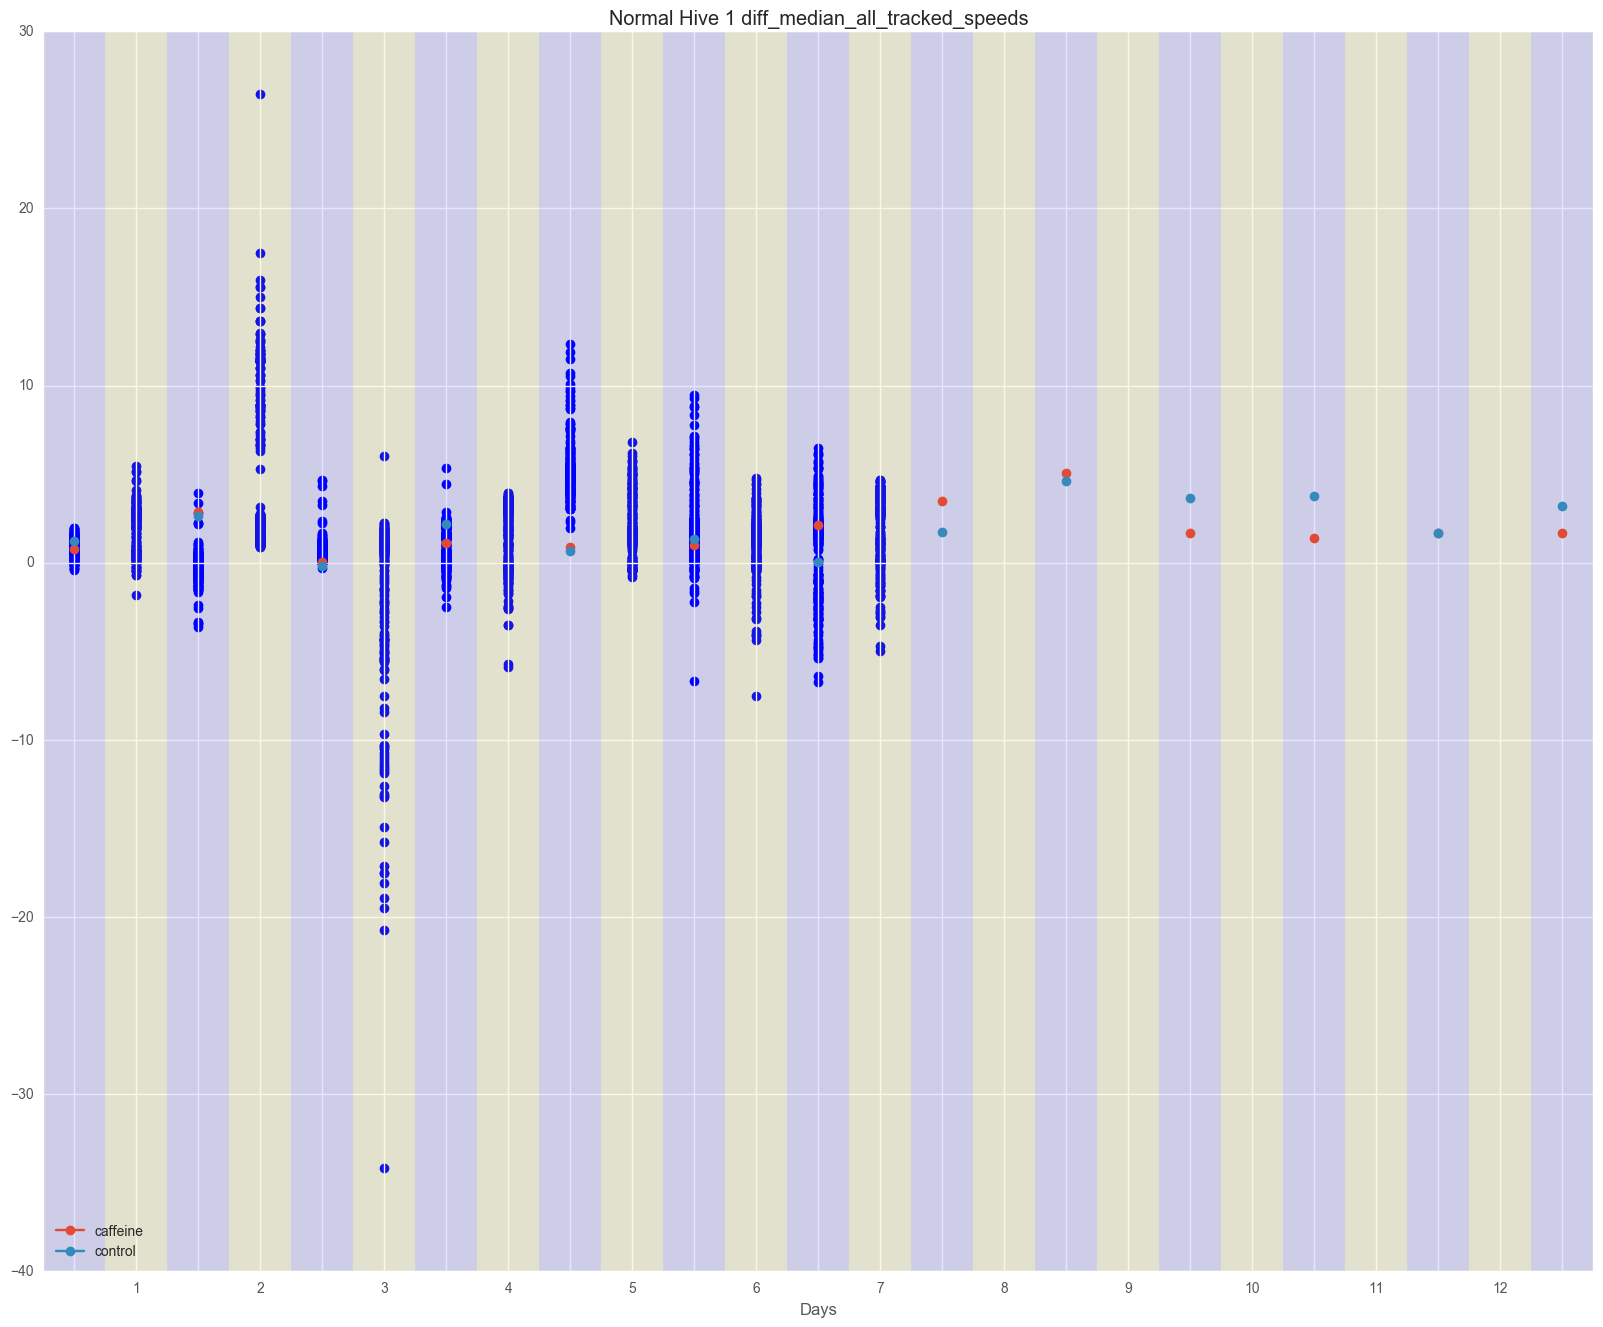

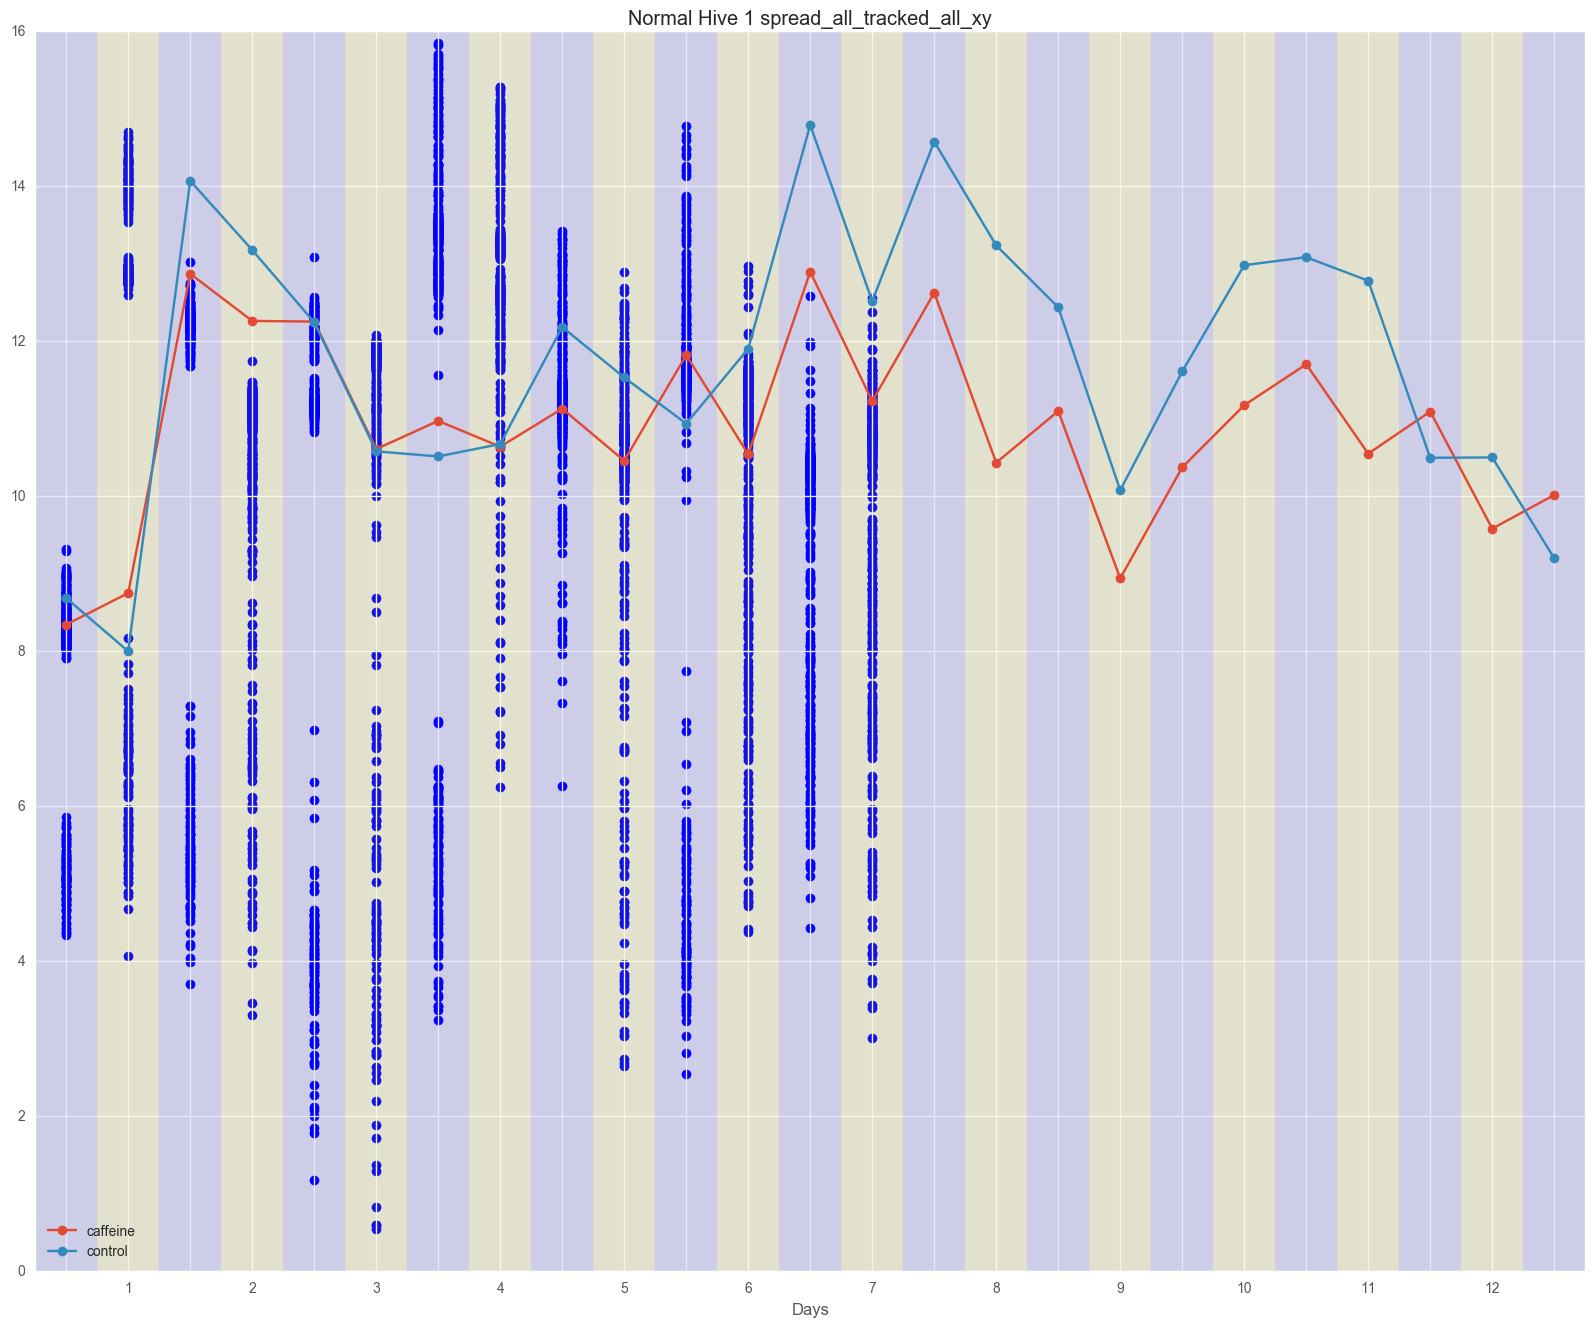

In [7]:
extended_metrics = ['diff_median_all_tracked_speeds', 'spread_all_tracked_all_xy']
metrics_names = ['diff_median_all_tracked_speeds', 'spread_all_tracked_all_xy']

for i, df in enumerate(real_result_df_list):
    night_df = df[df['time_period']=='night']
    df_caffeine = df[df['tag_type'] == '1'].reset_index()
    df_control = df[df['tag_type'] == '2'].reset_index()
    
    for metric in extended_metrics:
        
        indicate_sig = []
        p_values = []
        

        for shuffled_days in shuffled_permutations[i][metric]:
            plt.plot(shuffled_days[0:14], zorder=-32, marker='o', color='b', linestyle="None")

        plt.plot(list(night_df[metric])[0:14], marker='o', color='r', linestyle="None") #, label='{}'.format(hive_names[i])
        
        confidence_upper_lower_list = [tuple(np.percentile(day_results, [2.5, 97.5])) for day_results in list(zip(*bootstrapped_permutations[i][metric]))]                                   
        shuffled_upper_lower_list = [tuple(np.percentile(day_results, [0, 100])) for day_results in list(zip(*shuffled_permutations[i][metric]))]                                   
        
        y_error_lower = []
        y_error_upper = []
        for j, real_value in enumerate(list(night_df[metric])[0:14]):
            y_error_lower.append(real_value - confidence_upper_lower_list[j][0])
            y_error_upper.append(confidence_upper_lower_list[j][1] - real_value)
            
        y_shuffle_error_lower = []
        y_shuffle_error_upper = []
        shuffled_median_value = []
        for j, real_value in enumerate(list(night_df[metric])[0:14]):
            real_value = np.median(shuffled_upper_lower_list[j])
            shuffled_median_value.append(real_value)
            y_shuffle_error_lower.append(real_value - shuffled_upper_lower_list[j][0])
            y_shuffle_error_upper.append(shuffled_upper_lower_list[j][1] - real_value)
        
        metric_title, y_axis = formatting[metric]
        #print(metric_title, y_axis)
        
        plt.title('{} {}'.format(hive_names[i], metric_title))
        plt.xlim(-0.5,13.5)
        plt.ylim(ymax=y_axis[0], ymin=y_axis[1])
        plt.xticks(range(len(list(night_df[metric])[0:14])), range(len(list(night_df[metric])[0:14])), size='large')
        plt.xlabel('Day', fontsize=18)
        plt.ylabel('Difference', fontsize=18)
        
        plt.errorbar(range(len(shuffled_median_value)), shuffled_median_value, yerr=(y_shuffle_error_lower, y_shuffle_error_upper), color='b', fmt="o", alpha=0.5)
        plt.errorbar(range(len(list(night_df[metric])[0:14])), list(night_df[metric])[0:14], yerr=(y_error_lower, y_error_upper), color='r', fmt="o", alpha=0.5)
        
        for j, txt in enumerate(indicate_sig):
            plt.annotate(txt, (j, y_axis[2]), size=30, horizontalalignment='center', color='k')
        
        plt.show()

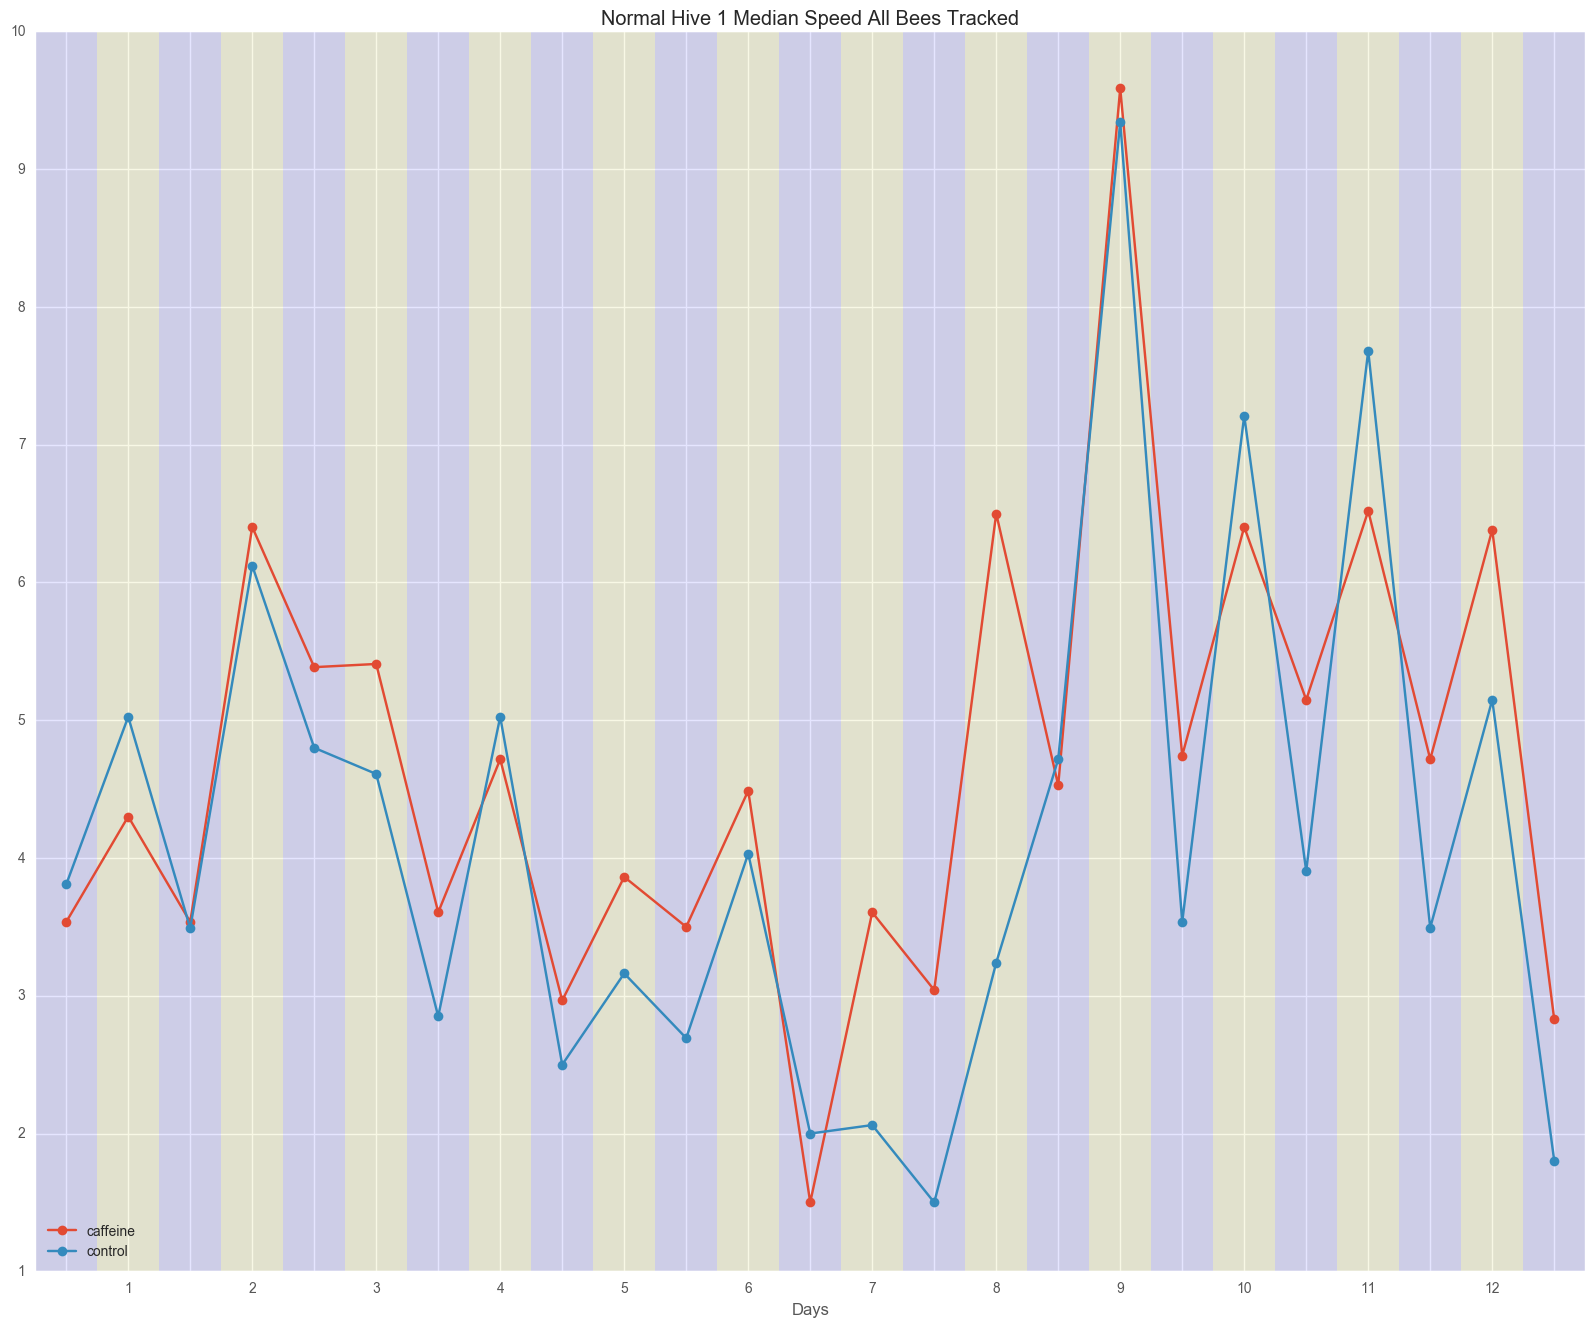

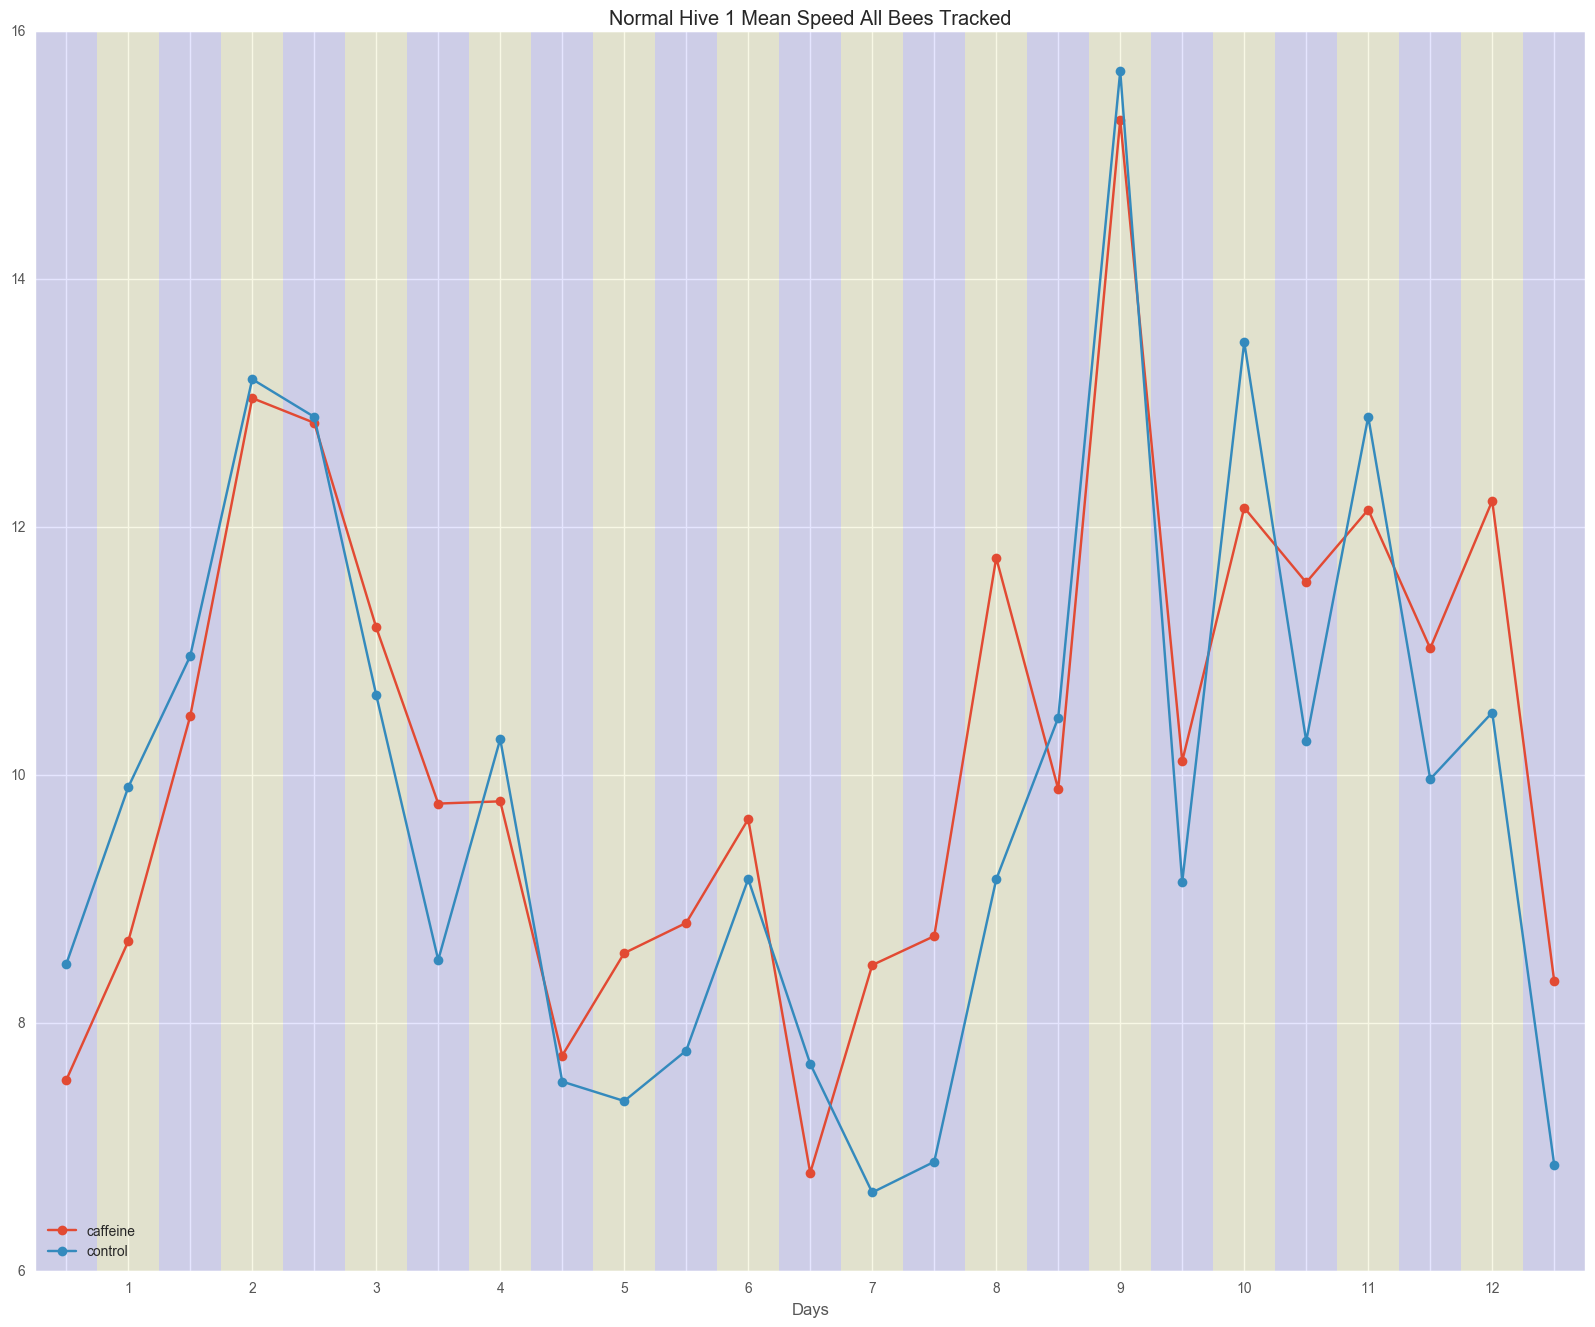

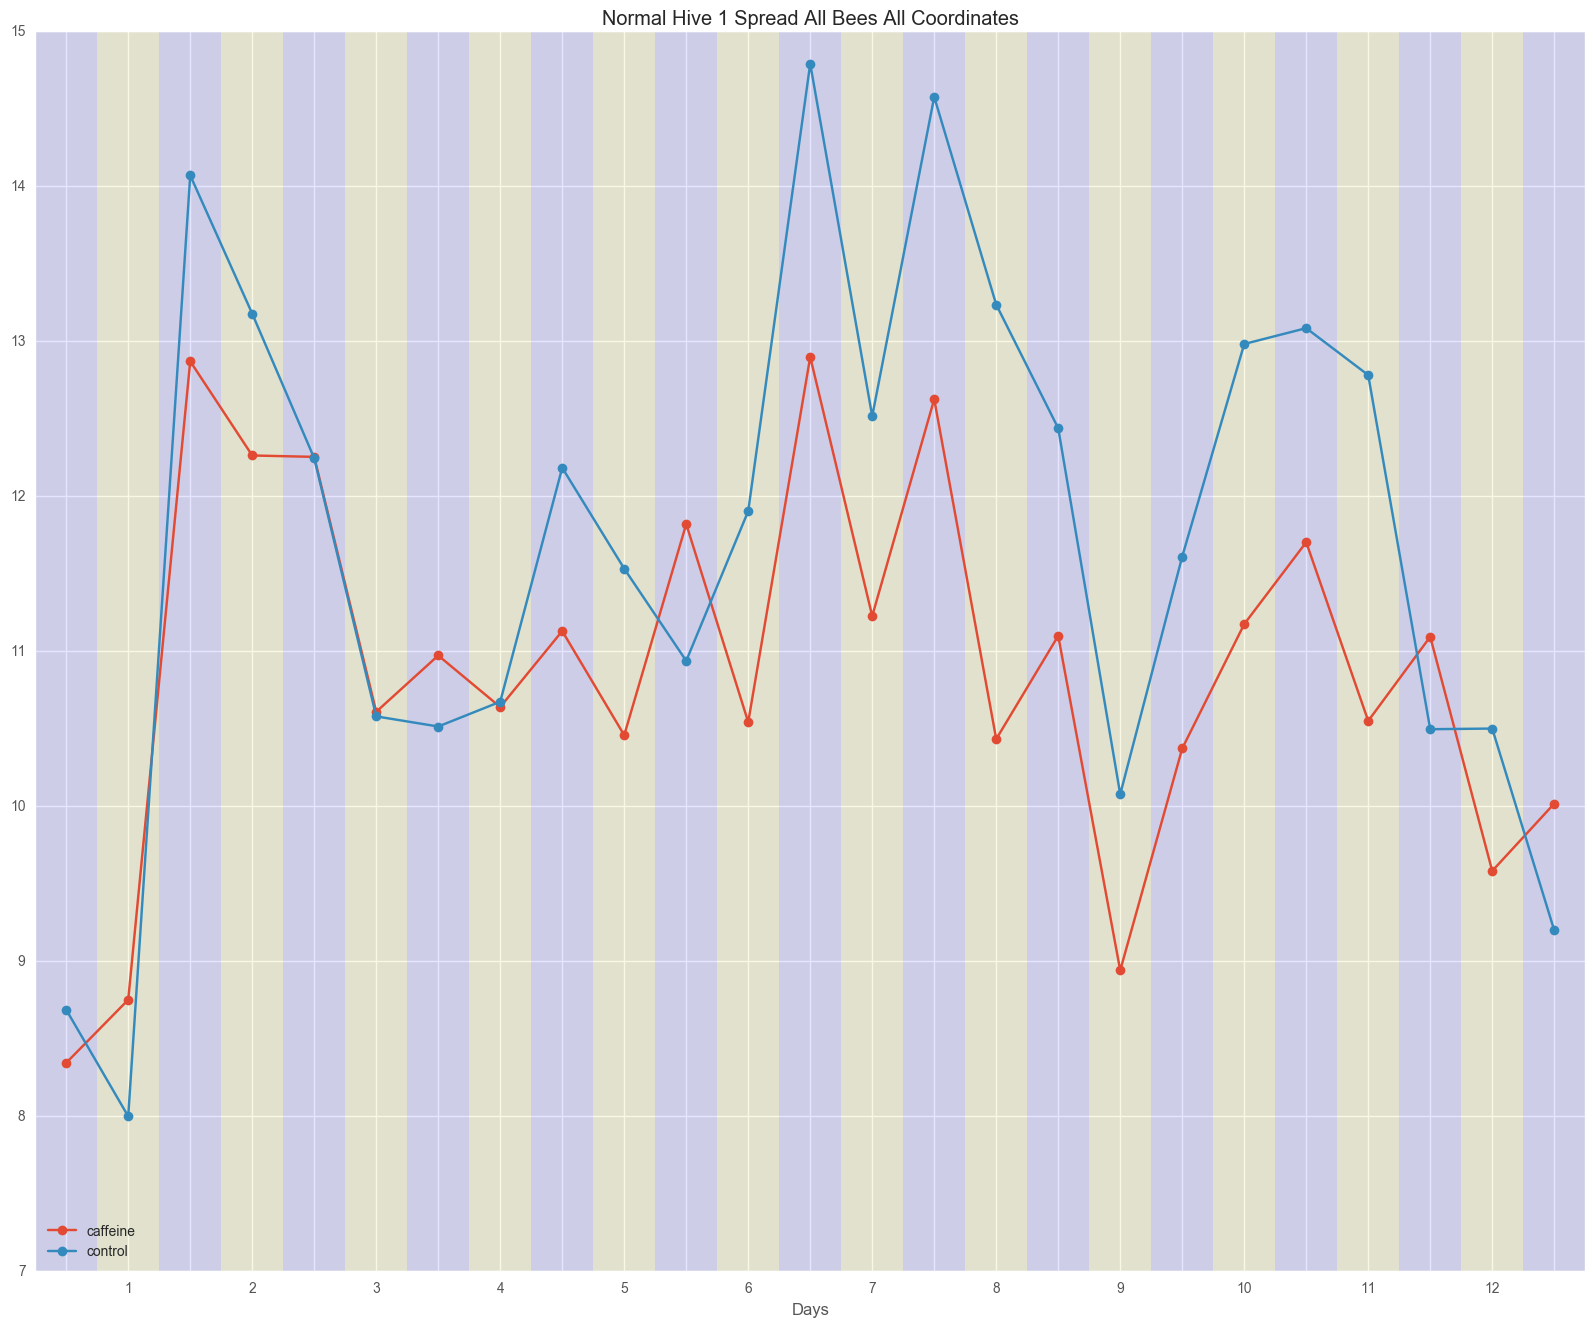

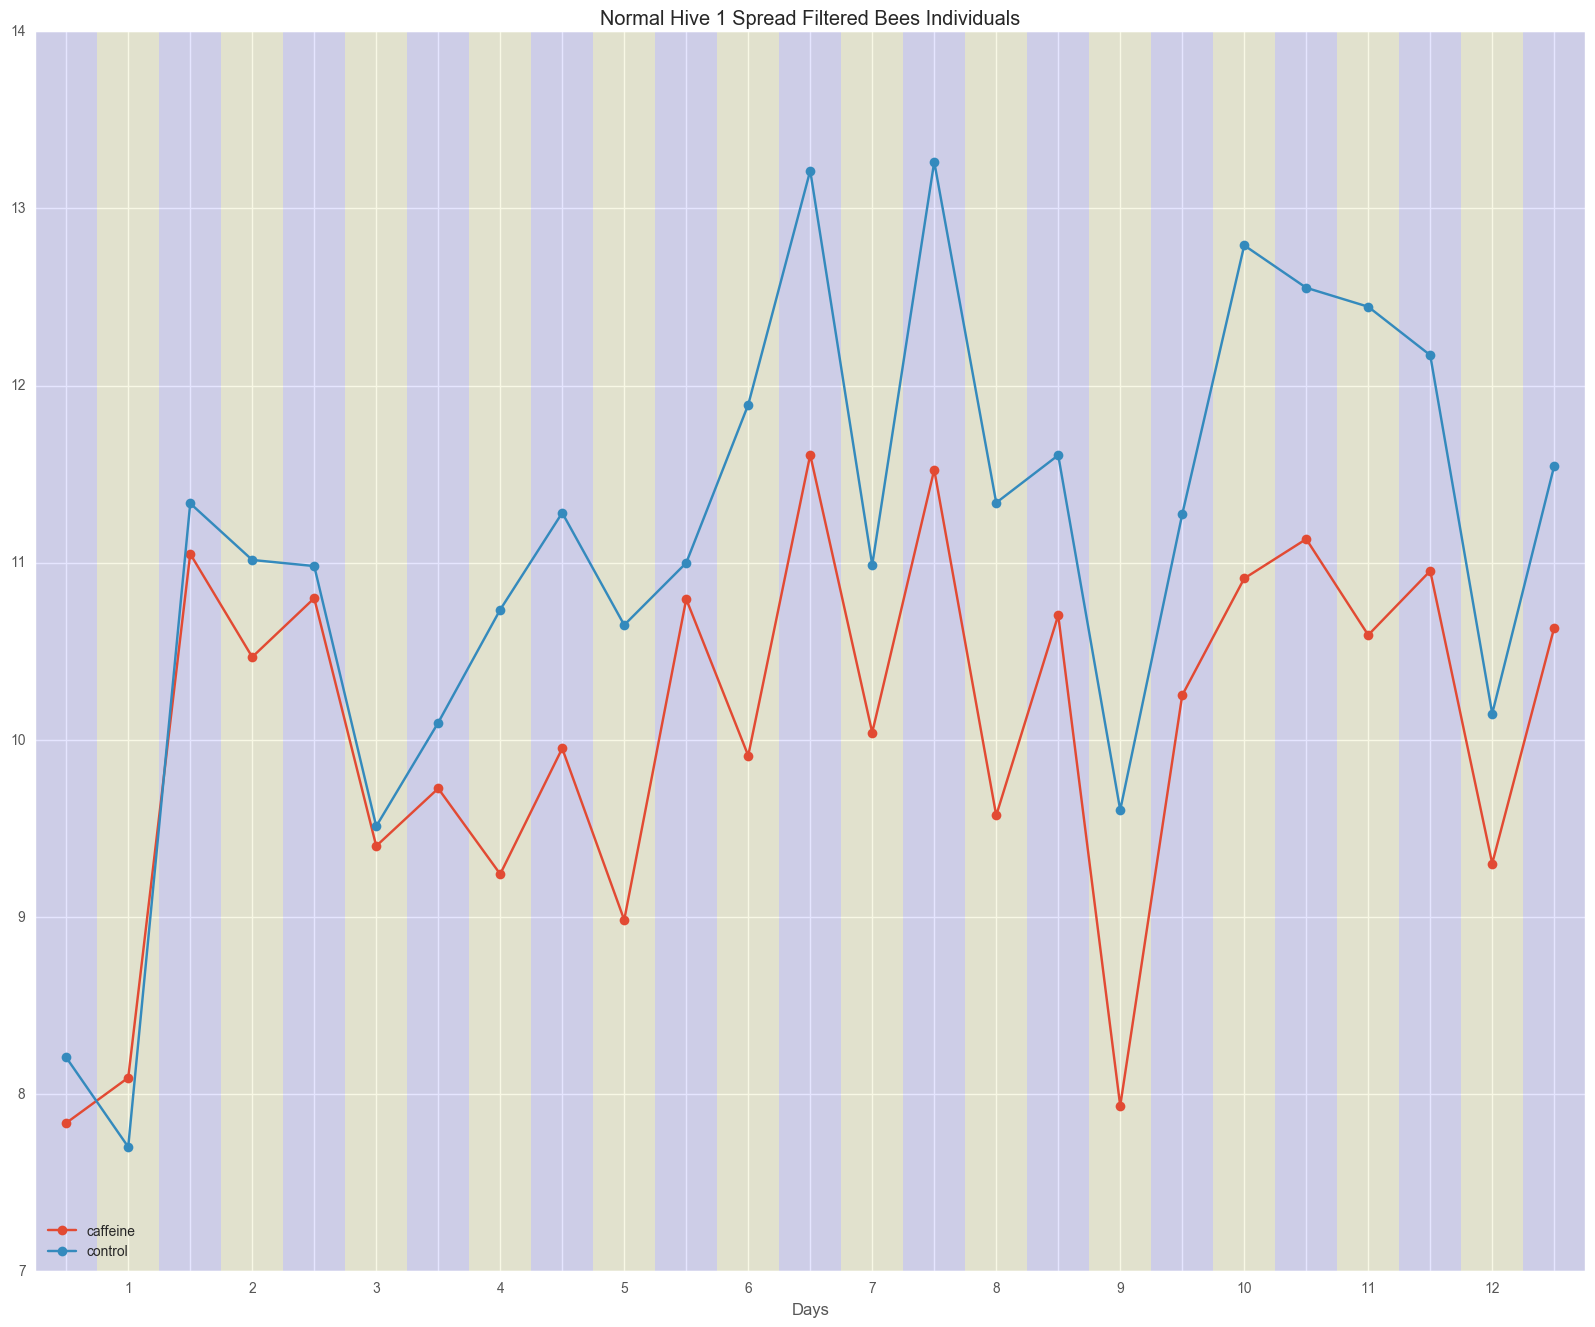

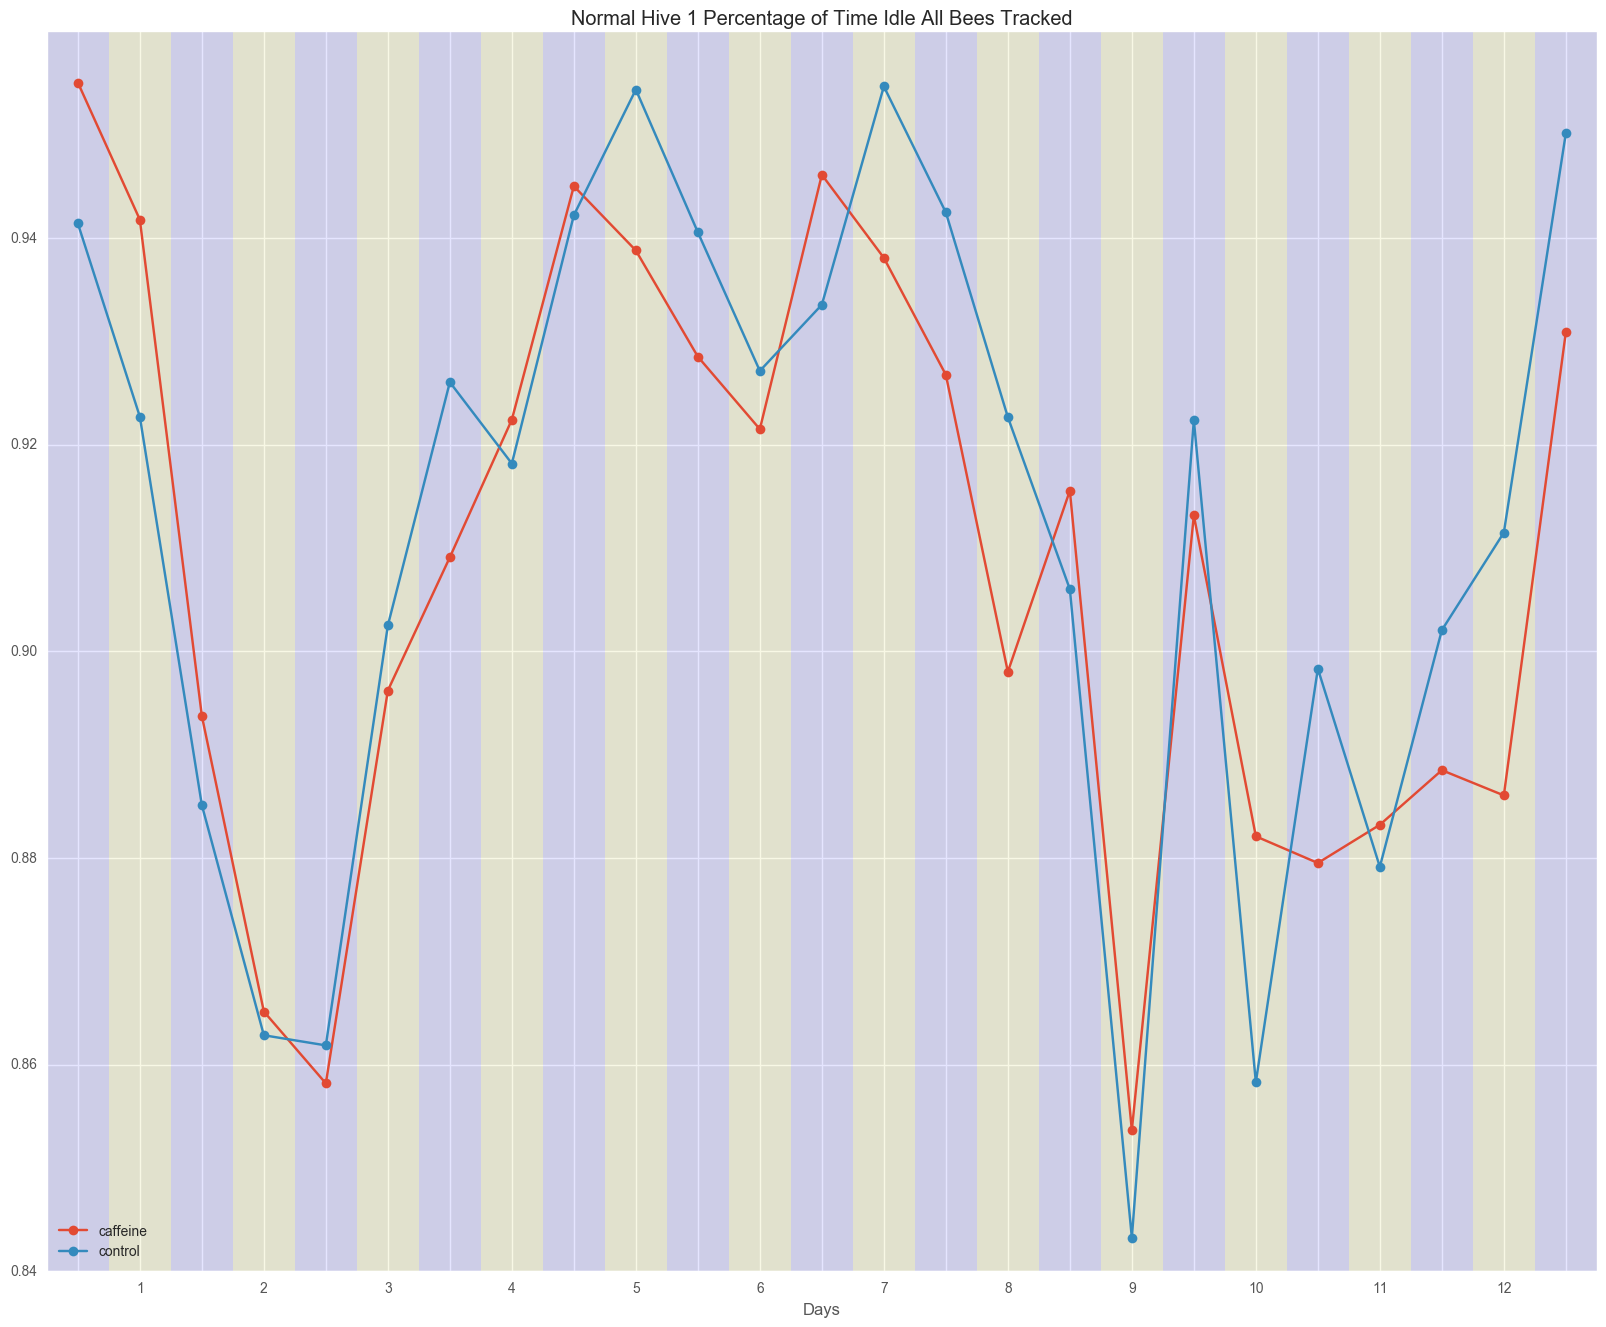

In [6]:
extended_metrics = ['median_all_tracked_speeds', 'mean_all_tracked_speeds', 'spread_all_tracked_all_xy', 'spread_min_tracked_individuals', 'percent_idle_all_tracked']
metrics_names = ['Median Speed All Bees Tracked', 'Mean Speed All Bees Tracked', 'Spread All Bees All Coordinates', 'Spread Filtered Bees Individuals', 'Percentage of Time Idle All Bees Tracked']

for k, metric in enumerate(extended_metrics):

    for i, df in enumerate(real_result_df_list):
        df_caffeine = df[df['tag_type'] == '1'].reset_index()
        df_control = df[df['tag_type'] == '2'].reset_index()
        plt.figure()
        plt.plot(df_caffeine[metric][0:25], marker='o', label='caffeine')
        plt.plot(df_control[metric][0:25], marker='o', label='control')
        
        plt.title('{} {}'.format(hive_names[i], metrics_names[k]))
        plt.xlabel('Days')
        plt.xlim(-0.5,24.5)
        x_len = len(df[metric][0:25])
        day_nums = []
        [day_nums.extend(['', ii + 1]) for ii in range(int(x_len / 2))]
        plt.xticks(range(x_len), day_nums)

        plt.legend(loc='lower left')

        for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
            if time_period == 'night':
                plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
            else:
                plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
        plt.show()

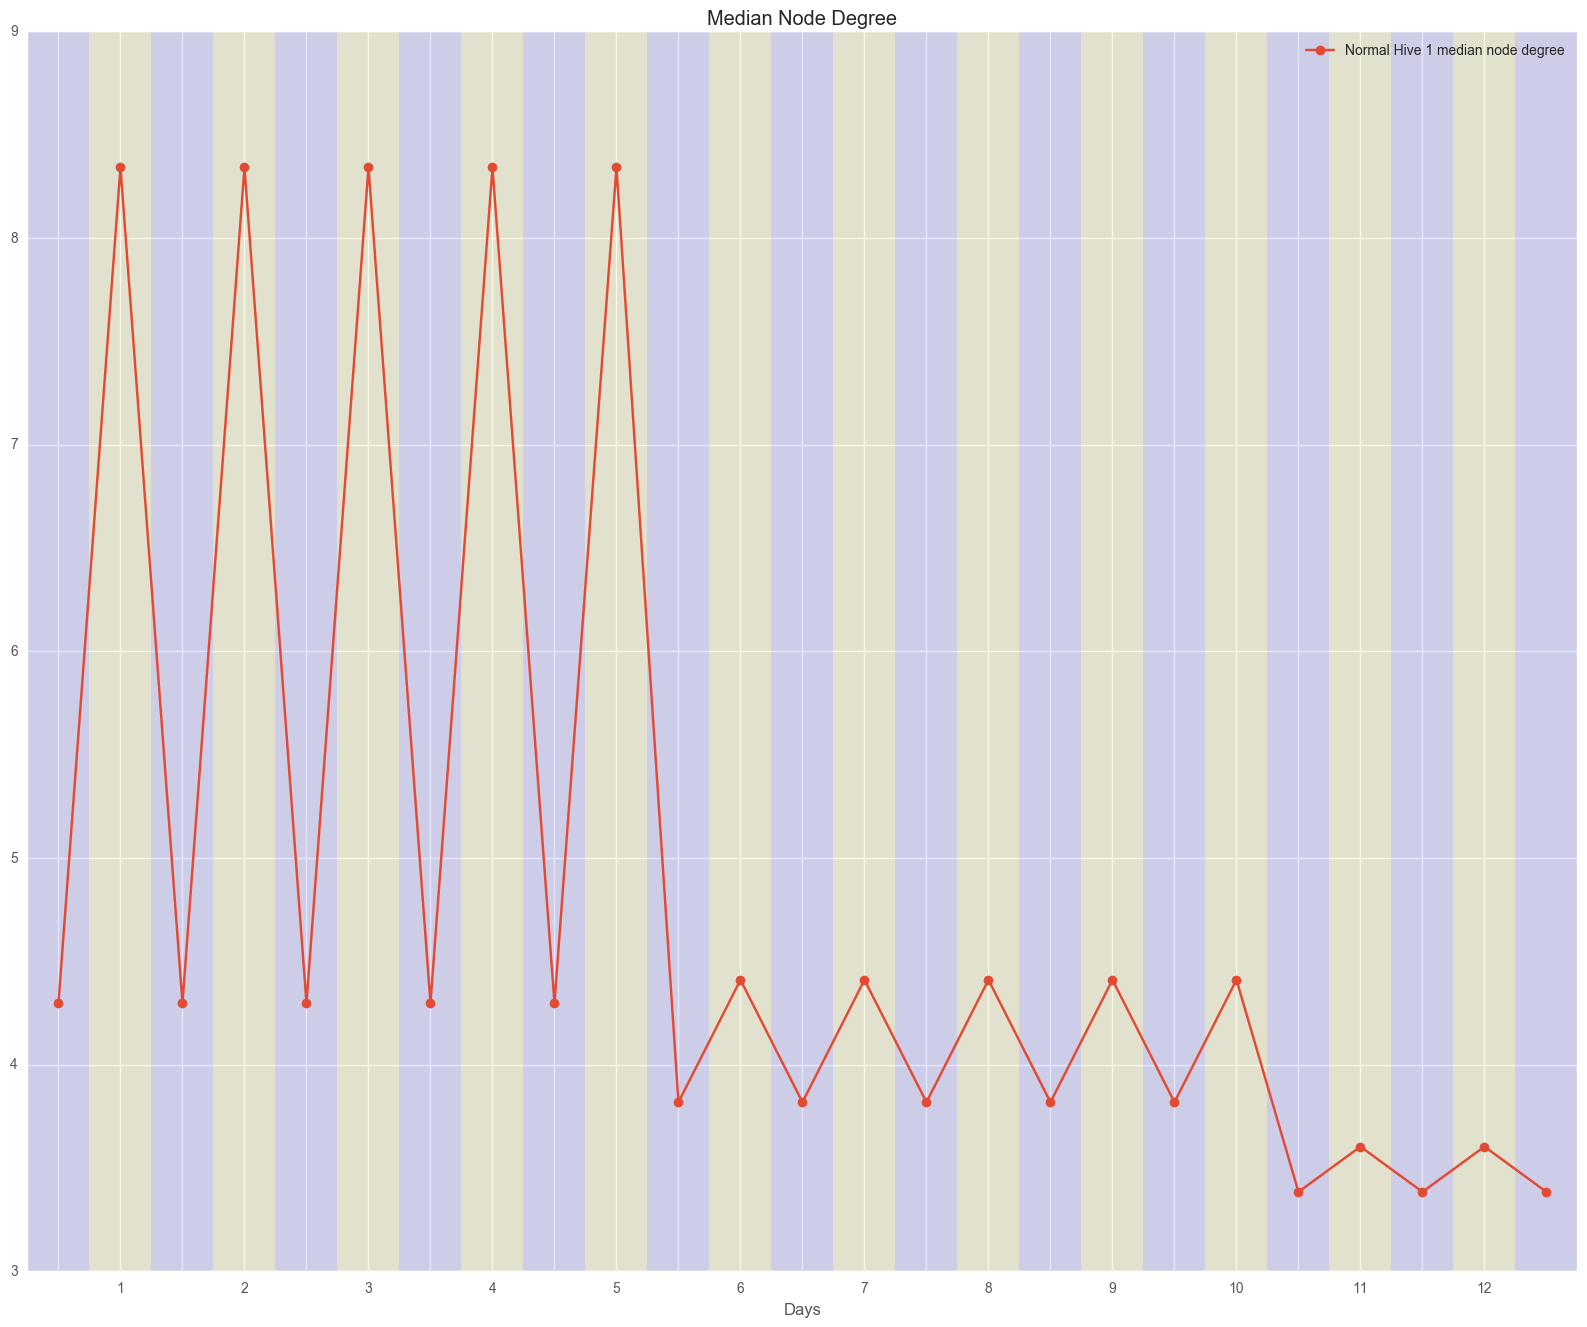

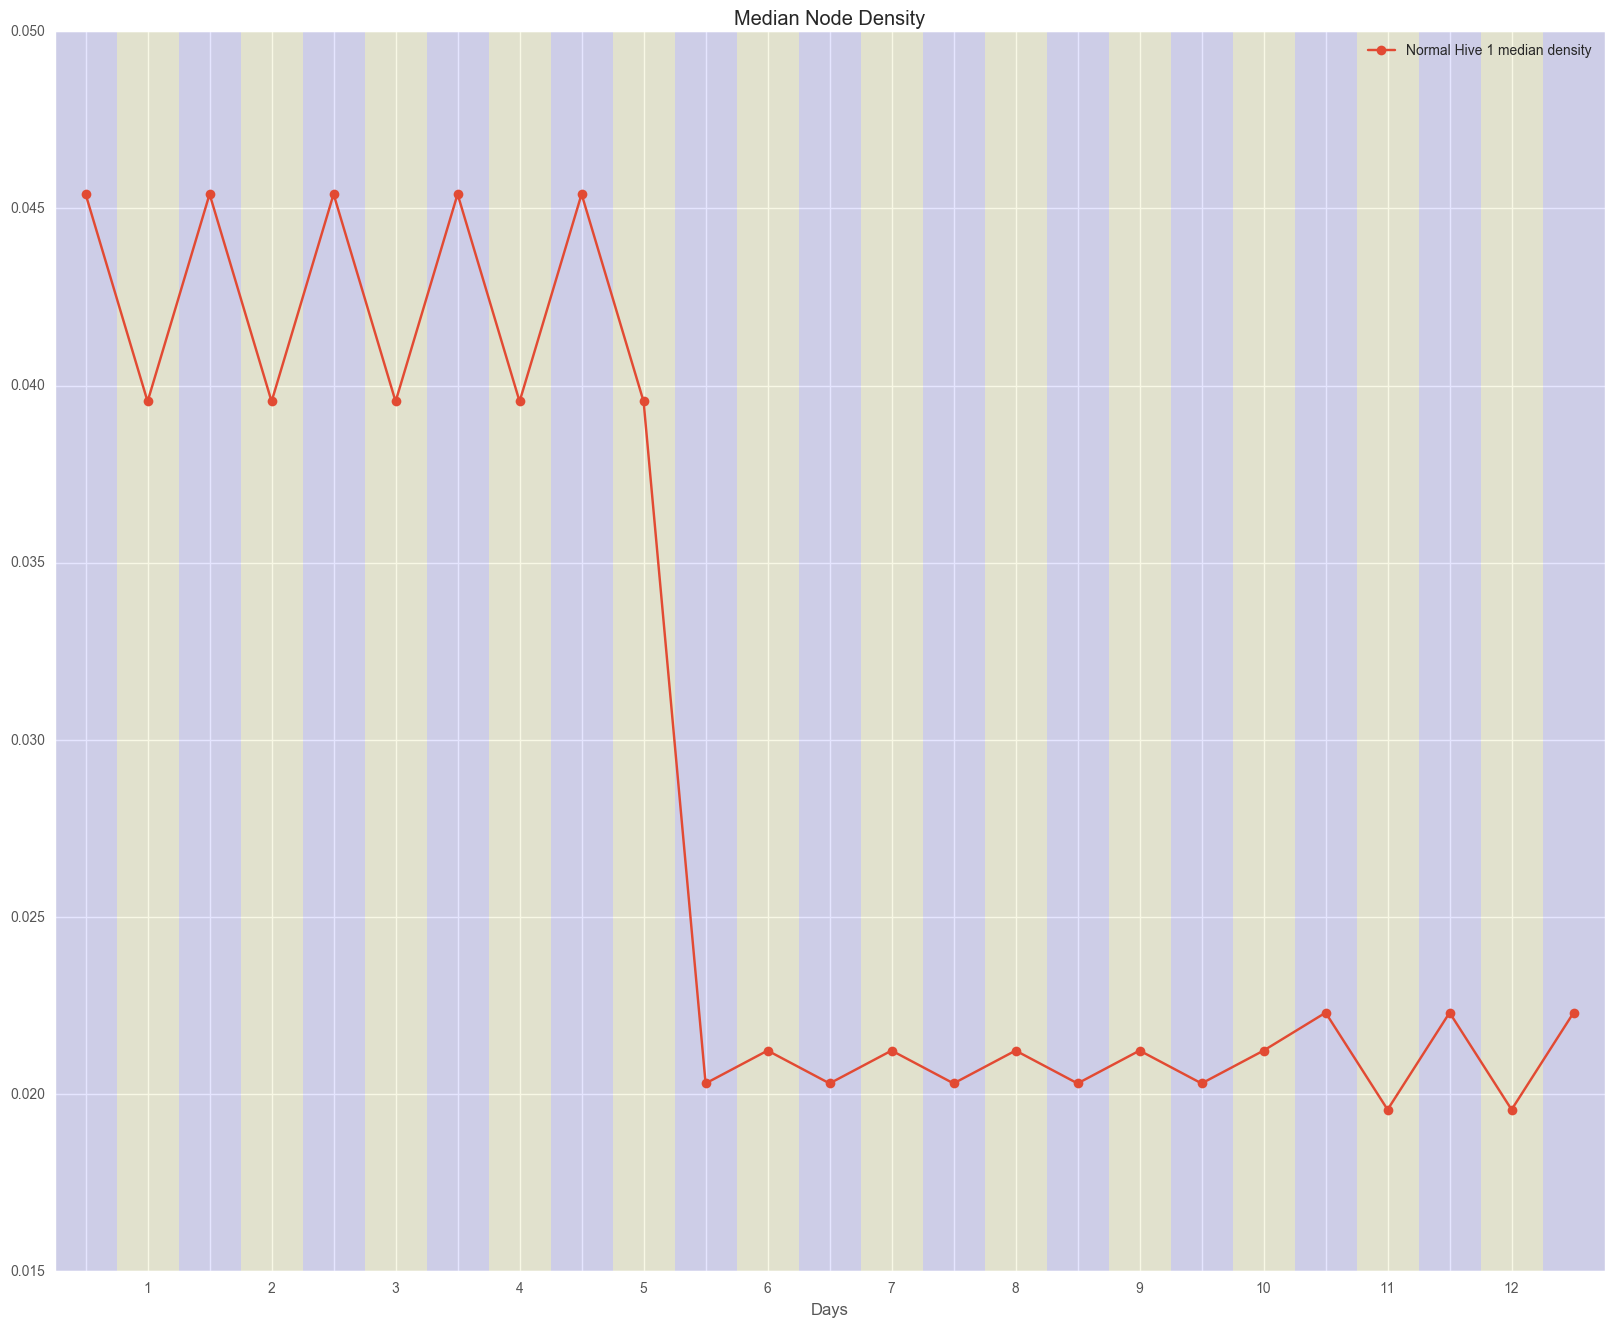

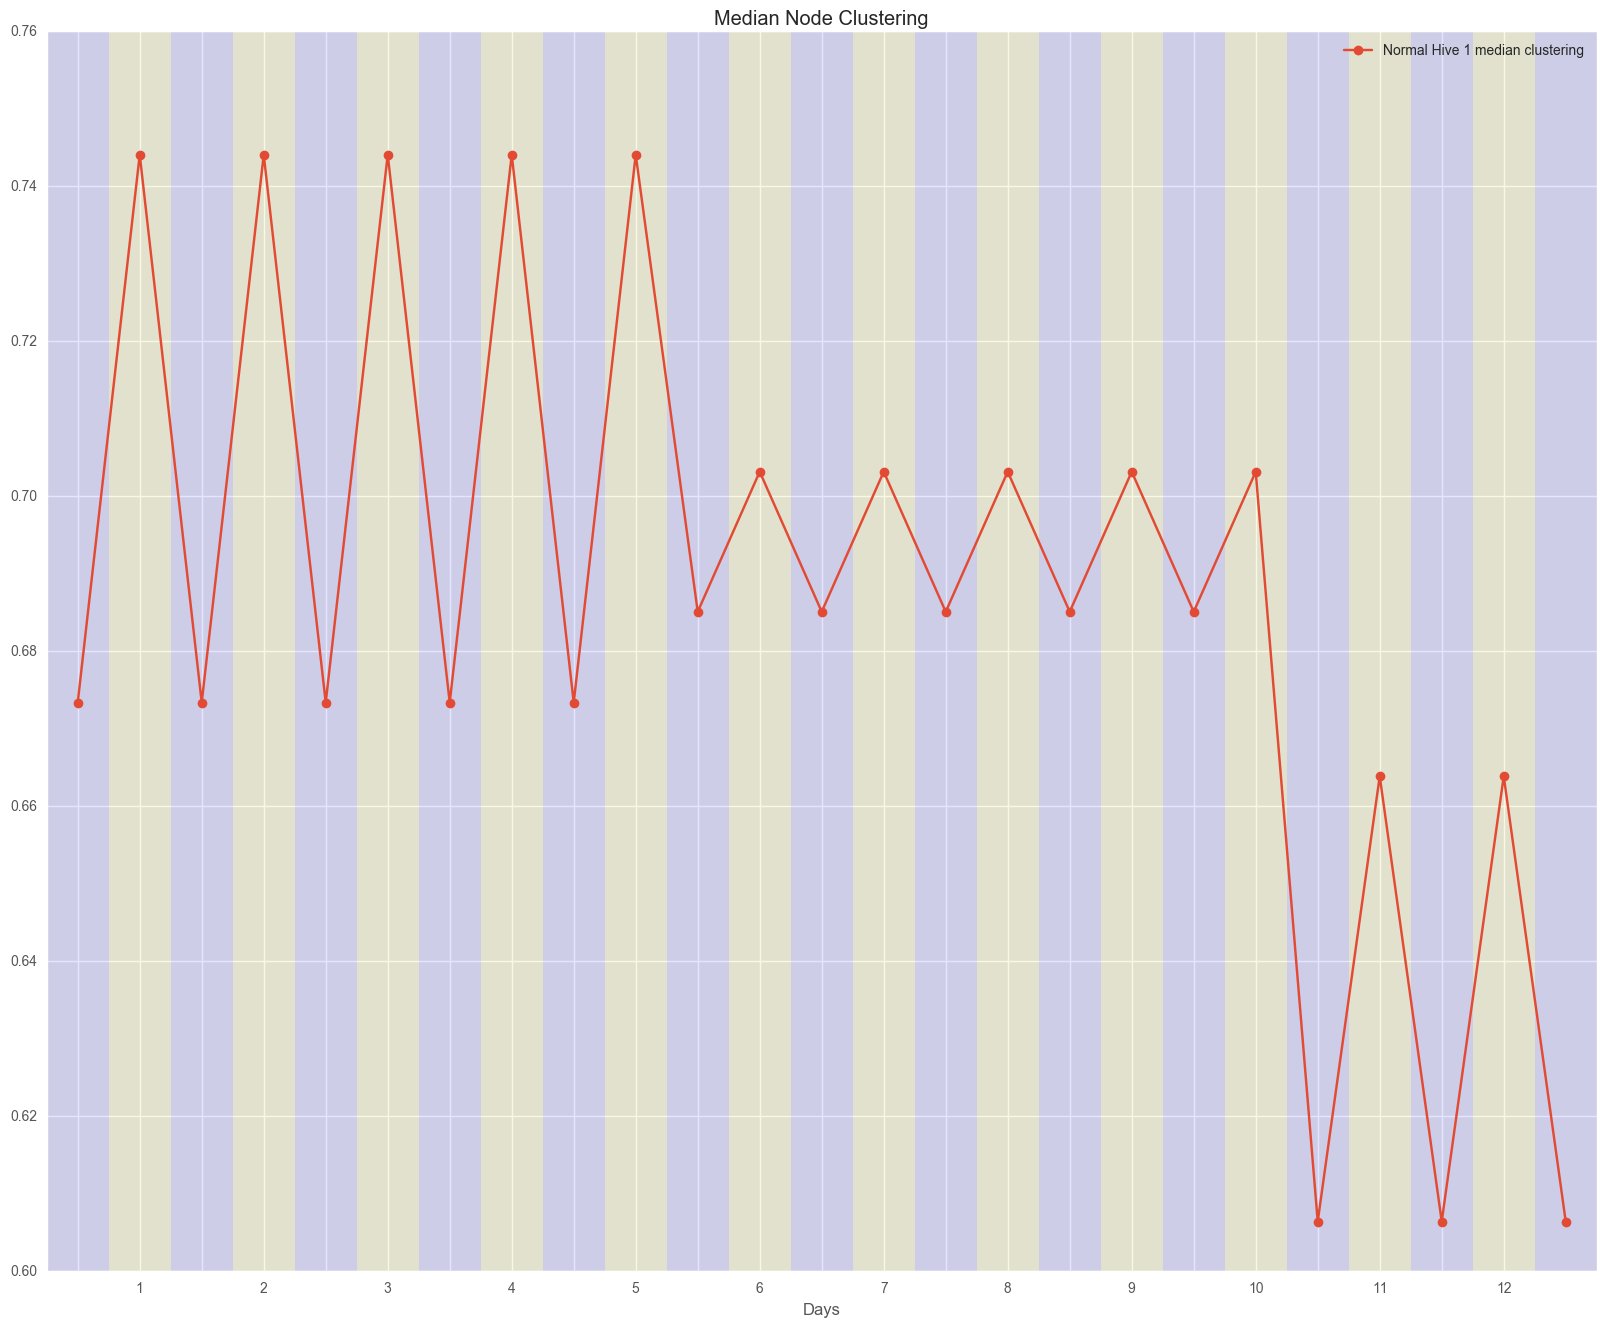

In [7]:
x_len = 24
day_nums = []

[day_nums.extend(['', ii + 1]) for ii in range(int(x_len / 2))]

for i, df in enumerate(real_result_df_list):
    plt.plot(df['median_node_degree'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'median node degree'))
    plt.title('Median Node Degree')
    plt.xlabel('Days')
    plt.xticks(range(x_len), day_nums)
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')
    
for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
    if time_period == 'night':
        plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
    else:
        plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
plt.show()

for i, df in enumerate(real_result_df_list):
    plt.plot(df['median_density'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'median density'))
    plt.title('Median Node Density')
    plt.xlabel('Days')
    plt.xticks(range(x_len), day_nums)
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')


for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
    if time_period == 'night':
        plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
    else:
        plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
plt.show()

for i, df in enumerate(real_result_df_list):
    plt.plot(df['median_clustering'][0:25], marker='o', label='{} {}'.format(hive_names[i], 'median clustering'))
    plt.title('Median Node Clustering')
    plt.xlabel('Days')
    plt.xticks(range(x_len), day_nums)
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')
    
for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
    if time_period == 'night':
        plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
    else:
        plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
plt.show()

In [ ]:
formatting = {'diff_spread_all_tracked_all_xy': ('Difference in Day and Night Spread for All Bees Tracked',(2,-3, 1.8)), 'diff_median_all_tracked_speeds': ('Difference in Day and Night Median Speed for All Bees Tracked',(9,-2.5, 8.5)), 'diff_median_density': ('Difference in Day and Night Median Density for All Bees Tracked',(0.02,-0.025, 0.017)), 'diff_percent_idle_all_tracked': ('Difference in Day and Night Percentage of Time Idle for All Bees Tracked',(0.1,-0.1, 0.09))}

for i, df in enumerate(real_result_df_list):
    night_df = df[df['time_period']=='night']
    
    for metric in shuffled_permutations[0].keys():
        
        indicate_sig = []
        p_values = []
        
        for j, result in enumerate(list(night_df[metric])[0:14]):
            num_diff = 1
            num = 1
            for shuffled_days in shuffled_permutations[i][metric]:
                num += 1
                if abs(shuffled_days[j]) > abs(result):
                    num_diff += 1

            p_value = num_diff / num
            p_values.append(p_value)
            if p_value >= 0.05:
                indicate_sig.append('')
            elif p_value < 0.001:
                indicate_sig.append('***')
            elif p_value < 0.01:
                indicate_sig.append('**')
            else:
                indicate_sig.append('*')
        
        plt.figure()
        
        '''
        for shuffled_days in shuffled_permutations[i][metric]:
            plt.plot(shuffled_days[0:14], zorder=-32, marker='o', color='b', linestyle="None")
        '''

        plt.plot(list(night_df[metric])[0:14], marker='o', color='r', linestyle="None") #, label='{}'.format(hive_names[i])
        
        confidence_upper_lower_list = [tuple(np.percentile(day_results, [2.5, 97.5])) for day_results in list(zip(*bootstrapped_permutations[i][metric]))]                                   
        shuffled_upper_lower_list = [tuple(np.percentile(day_results, [0, 100])) for day_results in list(zip(*shuffled_permutations[i][metric]))]                                   
        
        y_error_lower = []
        y_error_upper = []
        for j, real_value in enumerate(list(night_df[metric])[0:14]):
            y_error_lower.append(real_value - confidence_upper_lower_list[j][0])
            y_error_upper.append(confidence_upper_lower_list[j][1] - real_value)
            
        y_shuffle_error_lower = []
        y_shuffle_error_upper = []
        shuffled_median_value = []
        for j, real_value in enumerate(list(night_df[metric])[0:14]):
            real_value = np.median(shuffled_upper_lower_list[j])
            shuffled_median_value.append(real_value)
            y_shuffle_error_lower.append(real_value - shuffled_upper_lower_list[j][0])
            y_shuffle_error_upper.append(shuffled_upper_lower_list[j][1] - real_value)
        
        metric_title, y_axis = formatting[metric]
        #print(metric_title, y_axis)
        
        plt.title('{} {}'.format(hive_names[i], metric_title))
        plt.xlim(-0.5,13.5)
        plt.ylim(ymax=y_axis[0], ymin=y_axis[1])
        plt.xticks(range(len(list(night_df[metric])[0:14])), range(len(list(night_df[metric])[0:14])), size='large')
        plt.xlabel('Day', fontsize=18)
        plt.ylabel('Difference', fontsize=18)
        
        plt.errorbar(range(len(shuffled_median_value)), shuffled_median_value, yerr=(y_shuffle_error_lower, y_shuffle_error_upper), color='b', fmt="o", alpha=0.5)
        plt.errorbar(range(len(list(night_df[metric])[0:14])), list(night_df[metric])[0:14], yerr=(y_error_lower, y_error_upper), color='r', fmt="o", alpha=0.5)
        
        for j, txt in enumerate(indicate_sig):
            plt.annotate(txt, (j, y_axis[2]), size=30, horizontalalignment='center', color='k')
        
        plt.show()